1. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [ ]:
from pydataset import data

In [ ]:
iris_df = data('iris')

print the first 3 rows

In [ ]:
iris_df.head(3)

print the number of rows and columns (shape)


In [ ]:
iris_df.shape

print the column names

In [ ]:
iris_df.columns

print the data type of each column


In [ ]:
iris_df.dtypes

print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [ ]:
iris_df.describe()

2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [ ]:
import pandas as pd
import numpy as np
from env import host, password, username
def get_connection(db, user=username, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
url = get_connection('employees', username, host, password)


In [ ]:
df_excel = pd.read_excel('Excel_Exercises.xlsx', sheet_name='Table1_CustDetails')
df_excel.head(3)

assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
df_excel_sample = df_excel.head(100)

In [ ]:
df_excel_sample.shape

print the number of rows of your original dataframe

In [ ]:
df_excel.shape[0]

print the first 5 column names

In [ ]:
df_excel.columns[:5]

print the column names that have a data type of object

In [ ]:
df_excel.select_dtypes('object').columns

compute the range for each of the numeric variables.

In [ ]:
num_ranges = df_excel.select_dtypes(include=[np.number])
num_ranges = num_ranges.max() - num_ranges.min()

In [ ]:
num_ranges

3. Read the data from this google sheet into a dataframe, df_google

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)

print the first 3 rows

In [ ]:
df_google.head(3)

print the number of rows and columns

In [ ]:
df_google.shape

print the column names

In [ ]:
df_google.columns.tolist()

print the column names

In [ ]:
df_google.dtypes

In [ ]:
df_google.info()

print the summary statistics for each of the numeric variables

In [ ]:
df_google.describe()

print the unique values for each of your categorical variables


In [ ]:
df_google.nunique()

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

Acquire, prepare & split your data.

In [38]:
import acquire
import prepare

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from scipy import stats


In [2]:
iris_df = acquire.new_iris_data()

In [3]:
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_df = prepare.prep_iris(iris_df)

In [5]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [7]:
# split the data
from sklearn.model_selection import train_test_split

train_and_validate, test = train_test_split(
    iris_df,
    test_size=.15,
    random_state=1349,
)
train, validate = train_test_split(
    train_and_validate,
    test_size=.15,
    random_state=1349,
)

In [8]:
train.shape, validate.shape, test.shape

((107, 7), (20, 7), (23, 7))

1. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [9]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
5,5.4,3.9,1.7,0.4,setosa,0,0
92,5.8,2.6,4.0,1.2,versicolor,1,0
24,4.8,3.4,1.9,0.2,setosa,0,0
78,6.0,2.9,4.5,1.5,versicolor,1,0
19,5.1,3.8,1.5,0.3,setosa,0,0


In [18]:
# drop the dummy variables
sizes = train.drop(['species_versicolor', 'species_virginica'], axis=1)

In [19]:
variable_values = sizes.melt(id_vars='species',
                                    value_name='size')

In [20]:
variable_values.head()

,species,variable,size
0,setosa,sepal_length,5.4
1,versicolor,sepal_length,5.8
2,setosa,sepal_length,4.8
3,versicolor,sepal_length,6.0
4,setosa,sepal_length,5.1


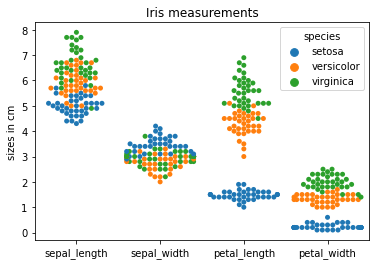

In [23]:
sns.swarmplot(data=variable_values,
              y='size',
              x='variable',
              hue='species')

plt.title('Iris measurements')
plt.xlabel('')
plt.ylabel('sizes in cm');

3. Create 4 subplots (2 rows x 2 columns) of scatterplots.

sepal_length x sepal_width



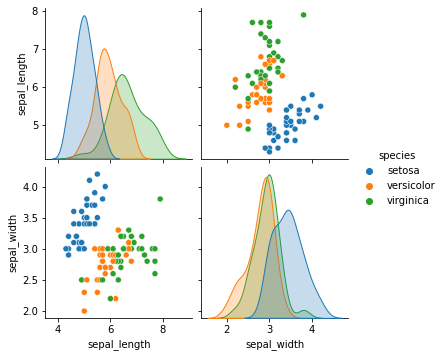

In [24]:
sns.pairplot(train,
                 hue='species',
                 x_vars = ['sepal_length', 'sepal_width'],
                 y_vars = ['sepal_length', 'sepal_width']
                )

petal_length x petal_width

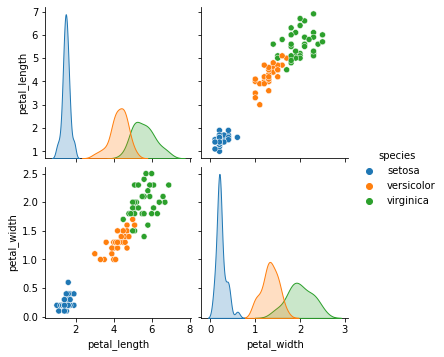

In [25]:
sns.pairplot(train,
                 hue='species',
                 x_vars = ['petal_length', 'petal_width'],
                 y_vars = ['petal_length', 'petal_width']
                )

sepal_area x petal_area

In [28]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width

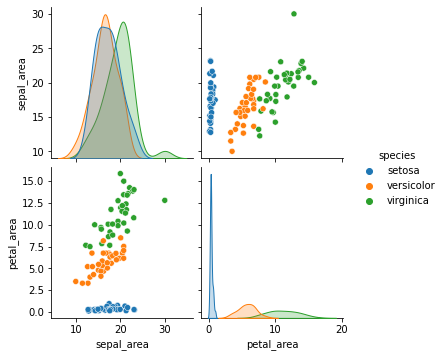

In [29]:
sns.pairplot(train,
                 hue='species',
                 x_vars = ['sepal_area', 'petal_area'],
                 y_vars = ['sepal_area', 'petal_area']
                )

sepal_length x petal_length

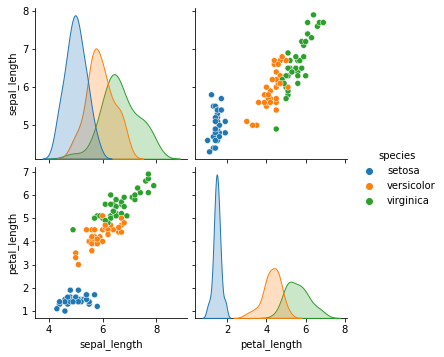

In [30]:
sns.pairplot(train,
                 hue='species',
                 x_vars = ['sepal_length', 'petal_length'],
                 y_vars = ['sepal_length', 'petal_length']
                )

4. Create a heatmap of each variable layering correlation coefficient on top.

<AxesSubplot:>

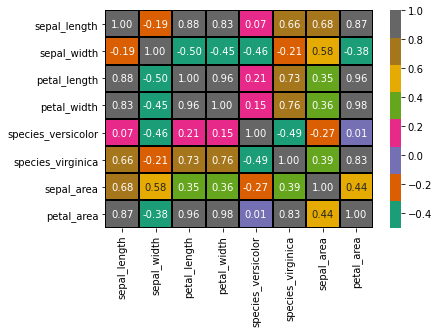

In [34]:
sns.heatmap(train.corr(), cmap= 'Dark2',  linewidth= 1, linecolor= 'k', annot= True, fmt='.2f')

5. Create a scatter matrix visualizing the interaction of each variable.

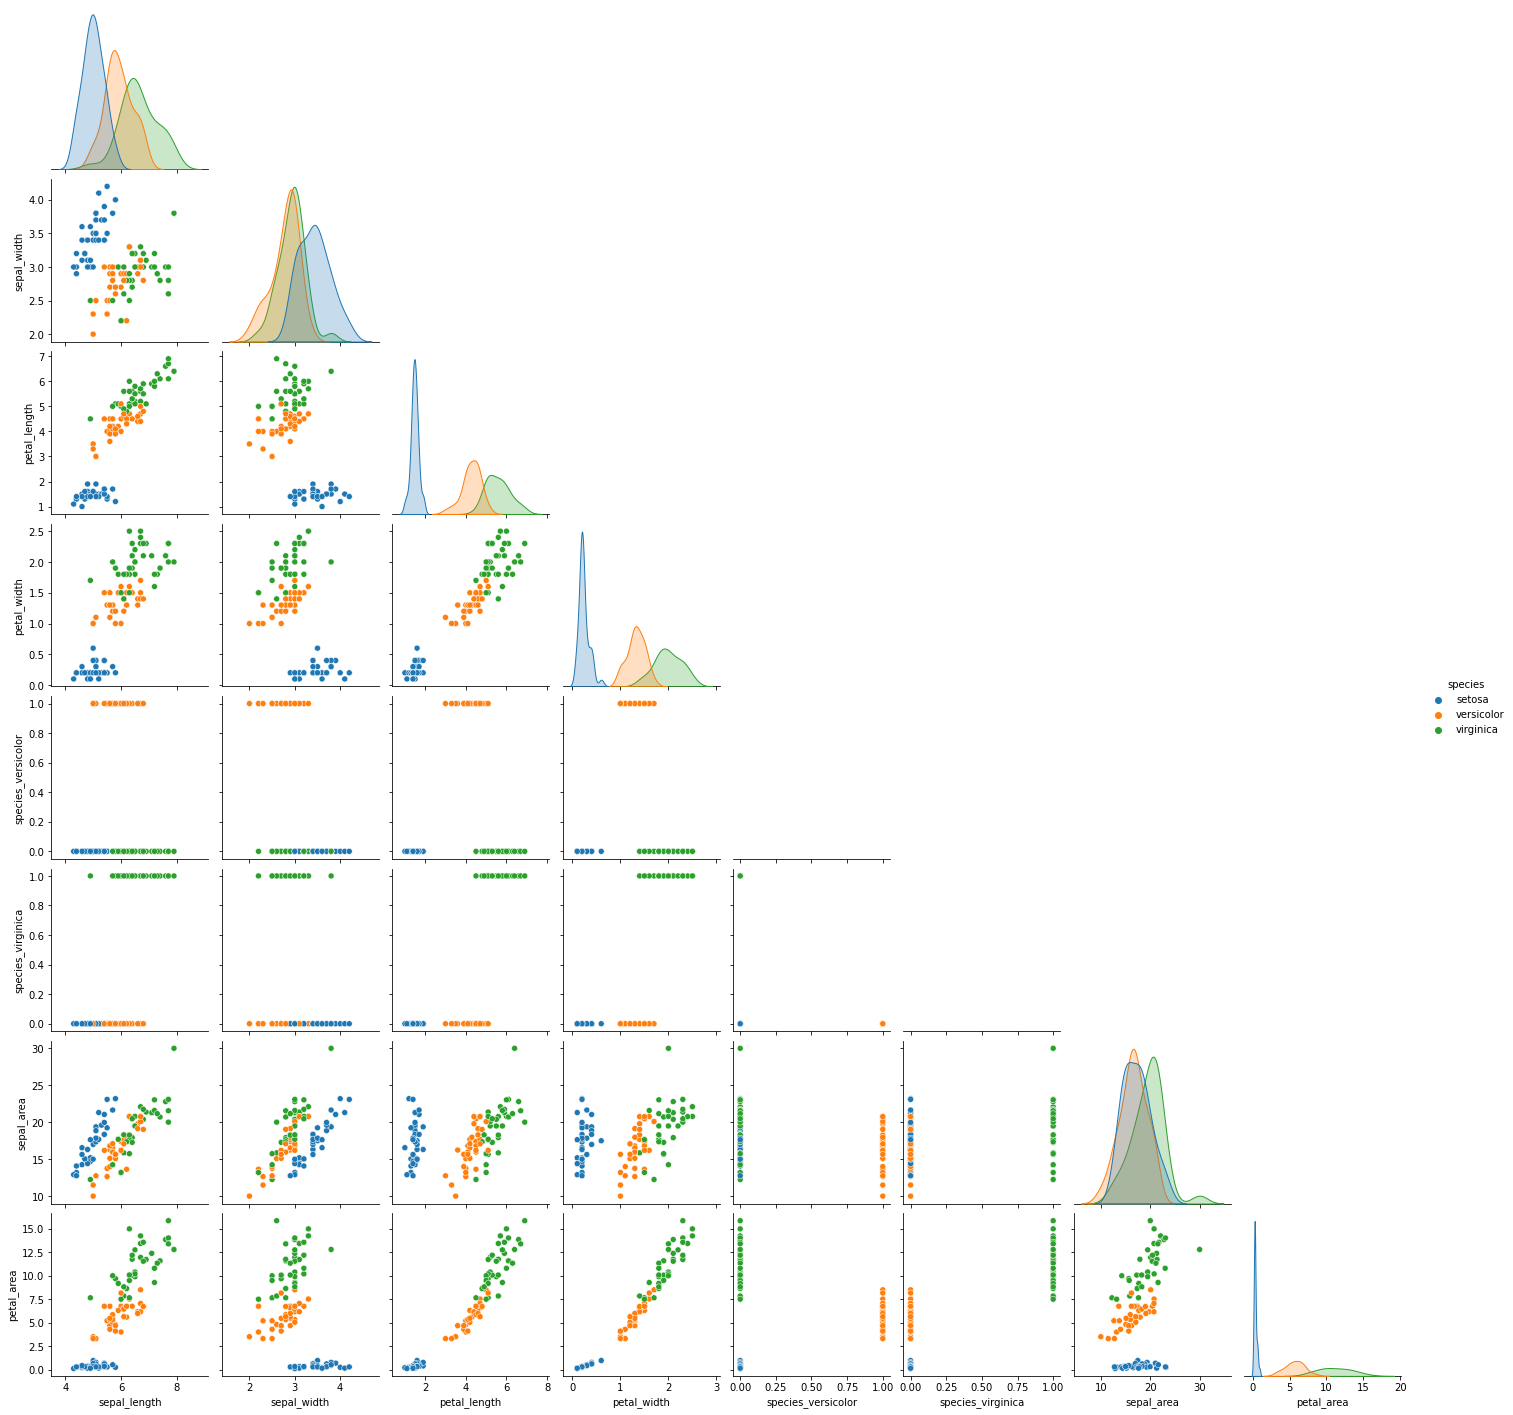

In [36]:
sns.pairplot(train, hue="species", corner=True)

6. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

What is your takeaway from this statistical testing?

Step 1. Establish Hypotheses
Two-sample T-test Hypothesis
Set Confidence Interval
Calculate alpha.

\$H_{O}$ There is no difference in sepal length in Iris-virginica v. Iris-versicolor.

\$H_{A}$ There is a difference in sepal length in Iris-virginica v. Iris-versicolor.

In [37]:
confidence_interval = 0.95
alpha = 1 - confidence_interval

In [41]:
virginica = train['sepal_length'][train['species'] == 'virginica']
versicolor = train['sepal_length'][train['species'] == 'versicolor']

In [44]:
t, p = stats.ttest_ind(virginica, versicolor, equal_var = False)

In [45]:
t, p

(5.238833181582445, 2.043162806383166e-06)

In [47]:
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')

 p is less than our alpha and we can reject the null hypothesis
